<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#France" data-toc-modified-id="France-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>France</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Fit-and-Predict" data-toc-modified-id="Fit-and-Predict-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit and Predict</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#23rd-April" data-toc-modified-id="23rd-April-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>23rd April</a></span></li><li><span><a href="#14th-April" data-toc-modified-id="14th-April-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>14th April</a></span></li><li><span><a href="#11th-April" data-toc-modified-id="11th-April-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>11th April</a></span></li><li><span><a href="#2nd-April" data-toc-modified-id="2nd-April-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>2nd April</a></span></li></ul></li></ul></div>

## France
Official figures here:
* https://www.santepubliquefrance.fr/maladies-et-traumatismes/maladies-et-infections-respiratoires/infection-a-coronavirus/articles/infection-au-nouveau-coronavirus-sars-cov-2-covid-19-france-et-monde

## Load data, Fit Model

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Get our Country model data
country = 'France'
filepath = '../data/raw/'

# Load and fix data
fix_data  = {'2020-03-12': 2876,
             '2020-03-15': 5423,
            }
non_care_fix = {
             '2020-03-30': 44550,
             '2020-03-31': 52128,
             '2020-04-01': 56989,
             '2020-04-04': 68605,
             '2020-04-05': 70478,
             '2020-04-06': 74390,
             '2020-04-07': 78167,
             '2020-04-08': 82048,
             '2020-04-09': 86334,
             '2020-04-10': 90676,
             '2020-04-11': 93790,
             '2020-04-12': 95403,
             '2020-04-13': 98076,
             '2020-04-14': 103575,
             '2020-04-15': 106206,
             '2020-04-16': 108847,
             '2020-04-17': 109252,
             '2020-04-18': 111821,
             '2020-04-19': 112606,
             '2020-04-20': 116606,
              }

fr = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fix_data)

fr.load()

## Fit and Predict

In [2]:
fr.fit(curve='gamma')
fr_df = fr.predict()
fr.save(filepath='../data/processed/')

## Display Actual vs Prediction

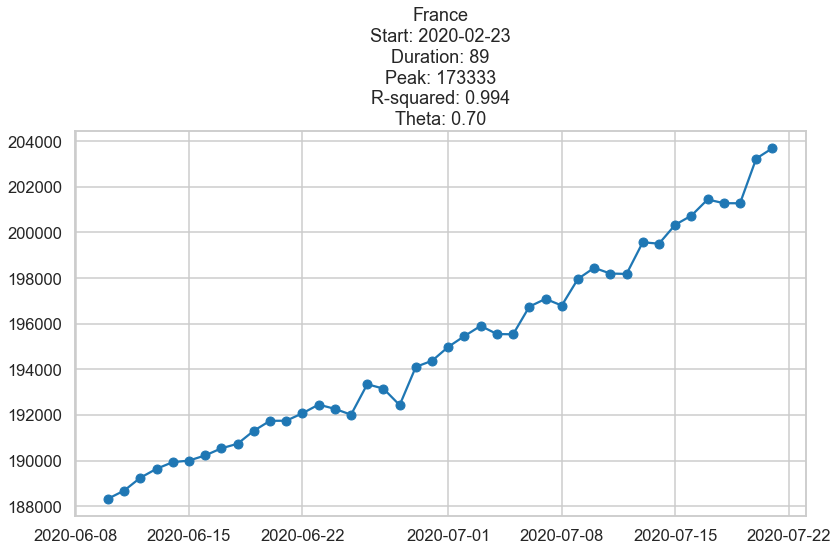

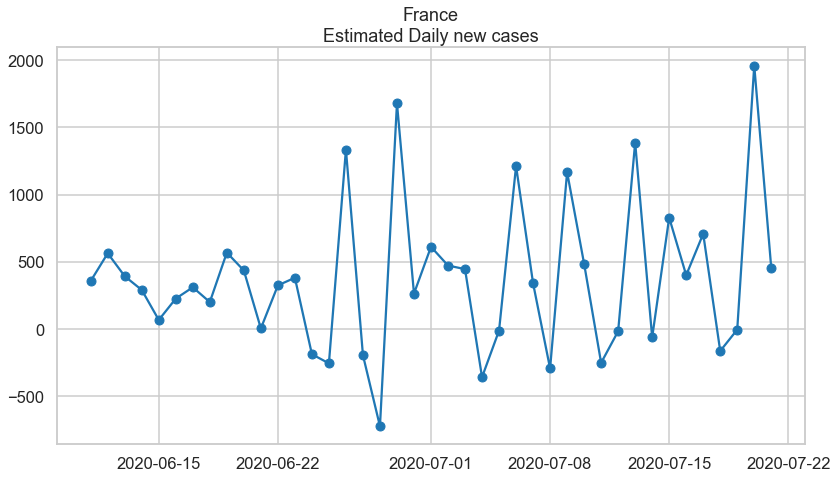

In [3]:
fr.display(offset=42)

## Commentary
### 23rd April
I've returned to the John Hopkins data now we are passed peak. It makes it easier to run each day. That makes the curve fit for France virtually impossible, and it was hard enough with the high variation before. I might remove France from the comparisons in future because of this.

### 14th April
Changed the duration to 85 days from 100 - better fit, but it might be shorter still.

### 11th April
The French daily case data is unlike its contemporaries. The variation is enormous and it is hard to know if that is instrumentation or a true reflection of real case counts in hospitals.

### 2nd April
John Hopkins data now includes non-hospital in the total. This is fair, but changes model fit. So I am instead adjusting to the French official hospital figures. It will under-read the total, like all countries, but it keeps the measure consistent for the model.